In [1]:
!pip install robin_stocks
import robin_stocks.robinhood as r
import pandas as pd
import numpy as np
import math as m
import matplotlib.pyplot as plt

     |████████████████████████████████| 131 kB 26.9 MB/s            


Library: [robin_stocks](https://readthedocs.org/projects/robin-stocks/downloads/pdf/latest/)

## Authentication and Login

In [2]:
login = r.login('kgraghav@mtu.edu','0214@Kgraghavan',store_session=True)

Enter Robinhood code for validation:  481387


## List of Cryptocurrencies available

In [3]:
crypto_info=r.crypto.get_crypto_currency_pairs()
crypto_list=[]
for i in range(len(crypto_info)):
    crypto_list.append(crypto_info[i]['asset_currency']['code'])

## Read in Portfolio

In [4]:
df_portfolio=pd.read_csv('portfolio.csv')
df_portfolio.set_index('Parameters',inplace=True)
columns_list=df_portfolio.columns.tolist()
columns_dict={}
for stock in columns_list:
    stock_str_rep=stock.replace('-','.')
    columns_dict[stock]=stock_str_rep
df_portfolio.rename(columns=columns_dict,inplace=True)
df_portfolio.sort_values(by='weight',axis=1,ascending=False)

,HGSH,PFE,KO,AWK,CLX,JNJ,ZNGA,DUK,BRK.B,GRPN,...,MCD,PEP,FB,MA,COST,INFY,IYR,NCLH,AAPL,PPBT
Parameters,,,,,,,,,,,,,,,,,,,,,
reward,1809.308109,1122.266658,627.556837,512.006348,447.914083,460.337554,508.278010,360.162331,384.617091,594.309159,...,362.395947,323.171549,398.445319,437.815693,313.748548,318.080713,223.957959,442.513606,323.236462,351.709151
risk,1.108928,1.331689,1.176362,1.056971,1.125047,1.279488,1.452548,1.185702,1.270244,2.051341,...,1.530461,1.367834,1.877376,2.094276,1.547538,1.820569,1.607817,3.567138,3.206557,3.770201
returns_ratio,1631.582402,842.739557,533.472545,484.409066,398.129101,359.782742,349.921571,303.754564,302.789875,289.717368,...,236.788674,236.265108,212.235224,209.053468,202.740498,174.714967,139.293171,124.052825,100.804843,93.286587
weight,0.197455,0.101989,0.064561,0.058623,0.048182,0.043541,0.042348,0.036760,0.036644,0.035062,...,0.028656,0.028593,0.025685,0.025300,0.024536,0.021144,0.016857,0.015013,0.012199,0.011290
price_bound,0.185581,5.333928,2.126010,3.165449,4.008253,5.860282,0.307256,2.310813,8.490643,1.916233,...,9.951010,4.793024,18.036321,22.038233,18.924467,1.008276,2.839818,2.046162,12.120015,0.345596
suggested_investment,790.016072,408.056494,258.308673,234.552020,192.775056,174.207658,169.432856,147.078681,146.611576,140.281838,...,114.653638,114.400126,102.764799,101.224186,98.167430,84.597402,67.446084,60.066672,48.809944,45.169587


In [5]:
port_stocks=df_portfolio.columns.tolist()

Total suggested equity value is: 4001.0


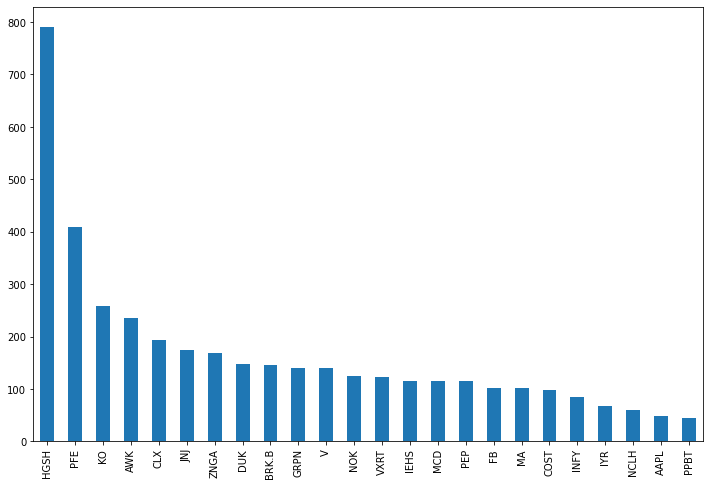

In [6]:
df_suggested_equity=df_portfolio.loc['suggested_investment',:]
df_suggested_equity.transpose().plot(kind='bar',figsize=(12,8));
total_port_equity=df_suggested_equity.sum()
print('Total suggested equity value is: {}'.format(total_port_equity))


## Print total stocks value

In [7]:
stocks_dict=r.account.build_holdings()
#print('Stocks are: {}'.format(stocks_dict))
tickers=stocks_dict.keys()
ticker_list=list(tickers)
for ticker in ticker_list:
    ticker.replace('-','.')
print(ticker_list)
###### Get crypto positions #####
crypto_holdings=r.get_crypto_positions()
print(float(crypto_holdings[3]['quantity']))

['VXRT', 'ZNGA', 'AAPL', 'FB', 'BRK.B', 'COST', 'PPBT', 'NOK', 'DUK', 'NCLH', 'GRPN', 'CLX', 'KO', 'MCD', 'IYR', 'PFE', 'V', 'HGSH', 'JNJ', 'MA', 'IEHS', 'PEP', 'AWK', 'INFY']
0.12950239


In [8]:
price_list=[float(stocks_dict[ticker]['equity']) for ticker in ticker_list]
for i in range(len(crypto_holdings)):
    if float(crypto_holdings[i]['quantity'])>0:
        crypto_ticker=crypto_holdings[i]['currency']['code'].replace('-USD','')
        crypto_qty=float(crypto_holdings[i]['quantity'])
        crypto_mark_price=float(r.get_crypto_quote(symbol=crypto_ticker,info='mark_price'))
        crypto_price=crypto_qty*crypto_mark_price
        price_list.append(crypto_price)
        ticker_list.append('{}.USD'.format(crypto_holdings[i]['currency']['code']))

## Stocks common to portfolio and investment

In [9]:
comm_stocks=list(set(port_stocks).intersection(set(ticker_list)))
print('Stocks common to recommended and actual portfolio: ',comm_stocks)
port_stocks=[stock.replace('-','.') for stock in port_stocks]

Stocks common to recommended and actual portfolio:  ['PPBT', 'BRK.B', 'CLX', 'GRPN', 'KO', 'COST', 'FB', 'PFE', 'IYR', 'INFY', 'V', 'VXRT', 'IEHS', 'ZNGA', 'HGSH', 'MA', 'AWK', 'MCD', 'JNJ', 'DUK', 'PEP', 'NCLH', 'AAPL', 'NOK']


## Stocks not common

### Stock in recommended portfolio but not in actual portfolio

In [10]:
not_in_ticker_list=[stock for stock in port_stocks if stock not in ticker_list]
not_in_ticker_list

[]

### Stock in  actual portfolio but not in recommended portfolio

In [11]:
not_in_port_stocks=[ticker for ticker in ticker_list if ticker not in port_stocks]
not_in_port_stocks

['BTC.USD']

## Share Price

In [12]:
share_price={}
share_price_values=[float(stocks_dict[ticker]['price']) for ticker in tickers]
for i in range(len(tickers)):
    ticker=ticker_list[i]
    share_price[ticker]=share_price_values[i]
share_price=pd.DataFrame(share_price,index=['price'])
share_price

,VXRT,ZNGA,AAPL,FB,BRK.B,COST,PPBT,NOK,DUK,NCLH,...,IYR,PFE,V,HGSH,JNJ,MA,IEHS,PEP,AWK,INFY
price,6.3109,6.1,174.39,328.385,313.26,552.0,4.1797,6.1103,103.67,21.905,...,111.03,54.77,220.34,2.155,170.96,367.7133,43.8699,174.43,176.12,24.255


## Share Quantity

In [13]:
share_quantity={}
share_quantities=[float(stocks_dict[ticker]['quantity']) for ticker in tickers]
for i in range(len(tickers)):
    ticker=ticker_list[i]
    share_quantity[ticker]=share_quantities[i]
share_quantity=pd.DataFrame(share_quantity,index=['quantity'])
share_quantity

,VXRT,ZNGA,AAPL,FB,BRK.B,COST,PPBT,NOK,DUK,NCLH,...,IYR,PFE,V,HGSH,JNJ,MA,IEHS,PEP,AWK,INFY
quantity,19.35,26.77,0.2713,0.2985,0.488,0.1734,11.32,19.67,1.41,2.76,...,0.5873,7.05,0.6426,364.175849,1.02,0.2801,2.51,0.6638,1.26,3.34


## Total Equity

Total Stocks equity value is: 9512.98591561077
Total Common Stocks equity value is: 3965.4500000000003


,BTC.USD,HGSH,PFE,KO,AWK,CLX,JNJ,ZNGA,BRK.B,GRPN,...,MCD,IEHS,MA,FB,COST,INFY,IYR,NCLH,AAPL,PPBT
Equity,5547.535916,784.8,386.13,266.32,221.91,199.67,174.38,163.3,152.87,147.41,...,114.65,110.11,103.0,98.02,95.72,81.01,65.21,60.46,47.31,47.31


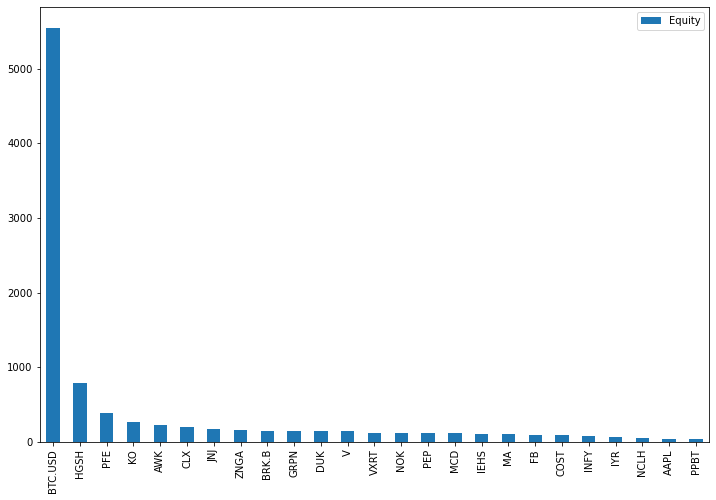

In [14]:
equity={}
total_equity=0
for i in range(len(ticker_list)):
    ticker=ticker_list[i]
    equity[ticker]=price_list[i]
    total_equity=total_equity+equity[ticker]
print('Total Stocks equity value is: {}'.format(total_equity))

equity_comm={}
total_comm_equity=0
for i in range(len(comm_stocks)):
    ticker=comm_stocks[i]
    equity_comm[ticker]=price_list[i]
    total_comm_equity=total_comm_equity+equity_comm[ticker]
print('Total Common Stocks equity value is: {}'.format(total_comm_equity))

df_equity=pd.DataFrame.from_dict(data=equity,orient='index',columns=['Equity'])
df_plot=df_equity.sort_values(by='Equity',axis=0,ascending=False)
if df_plot.shape[0]>0:
    df_plot.plot(kind='bar',figsize=(12,8))
else:
    print('no data to plot')
df_equity=df_equity.transpose()
df_equity.sort_values(by='Equity',axis=1,ascending=False)

In [15]:
ticker_list

['VXRT',
 'ZNGA',
 'AAPL',
 'FB',
 'BRK.B',
 'COST',
 'PPBT',
 'NOK',
 'DUK',
 'NCLH',
 'GRPN',
 'CLX',
 'KO',
 'MCD',
 'IYR',
 'PFE',
 'V',
 'HGSH',
 'JNJ',
 'MA',
 'IEHS',
 'PEP',
 'AWK',
 'INFY',
 'BTC.USD']

## Equity Change

In [16]:
df_suggested_equity

HGSH     790.016072
PFE      408.056494
KO       258.308673
AWK      234.552020
CLX      192.775056
JNJ      174.207658
ZNGA     169.432856
DUK      147.078681
BRK.B    146.611576
GRPN     140.281838
V        140.264437
NOK      124.123231
VXRT     123.284258
IEHS     114.707282
MCD      114.653638
PEP      114.400126
FB       102.764799
MA       101.224186
COST      98.167430
INFY      84.597402
IYR       67.446084
NCLH      60.066672
AAPL      48.809944
PPBT      45.169587
Name: suggested_investment, dtype: float64

Total Common equity change value is: -35.54999999999998
Total Common Change Percent is: -0.8885278680329913
                          KO      GRPN       CLX     BRK.B      PPBT  \
Equity_Comm_Change  8.011327  7.128162  6.894944  6.258424  2.140413   

                          MA       PEP         V      NCLH       JNJ  ...  \
Equity_Comm_Change  1.775814  1.389874  1.325563  0.393328  0.172342  ...   

                         IYR     COST      INFY       NOK      IEHS        FB  \
Equity_Comm_Change -2.236084 -2.44743 -3.587402 -3.933231 -4.597282 -4.744799   

                        HGSH      ZNGA       AWK        PFE  
Equity_Comm_Change -5.216072 -6.132856 -12.64202 -21.926494  

[1 rows x 24 columns]


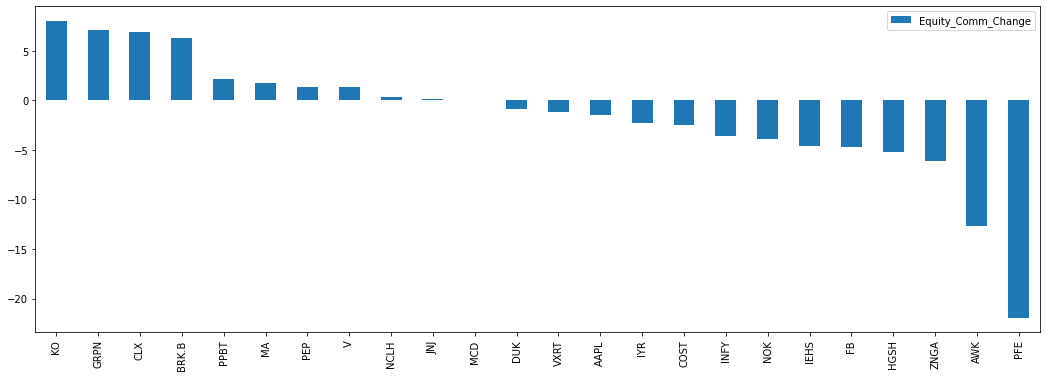

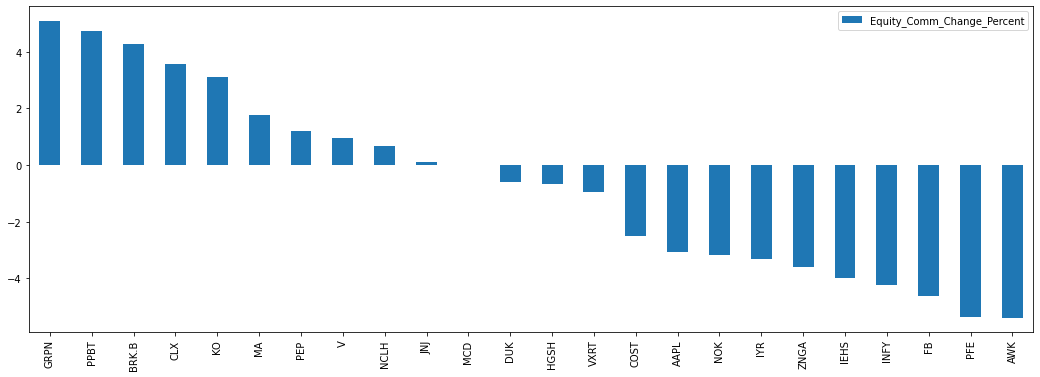

In [17]:
if len(ticker_list)>0:
    equity_change={}
    total_port_equity_change=0
    for i in range(len(ticker_list)):
        stock=ticker_list[i]
        if stock in df_equity.columns.tolist() and stock in df_suggested_equity.index.tolist():
            equity_change[stock]=df_equity.loc['Equity',stock]-df_suggested_equity[stock]
            total_port_equity_change=total_port_equity_change+equity_change[stock]

    equity_change_percent=total_port_equity_change/total_port_equity*100
    df_equity_change=pd.DataFrame.from_dict(data=equity_change,orient='index',columns=['Equity_Change']).transpose()
    df_equity_change_ratio=pd.DataFrame(df_equity_change.
                                 div(df_suggested_equity))
    df_equity_change_percent=df_equity_change_ratio*100
    df_equity_change_ratio.rename(index={'Equity_Change':'Equity_Change_Ratio'},inplace=True)
    df_equity_change_percent.rename(index={'Equity_Change':'Equity_Change_Percent'},inplace=True)

    if len(comm_stocks)>0:
        equity_comm_change={}
        total_equity_comm_change=0
        for i in range(len(comm_stocks)):
            comm_stock=comm_stocks[i]
            equity_comm_change[comm_stock]=df_equity.loc['Equity',comm_stock]-df_suggested_equity[comm_stock]
            total_equity_comm_change=total_equity_comm_change+equity_comm_change[comm_stock]
        print('Total Common equity change value is: {}'.format(total_equity_comm_change))


        equity_comm_change_percent=total_equity_comm_change/total_port_equity*100
        print('Total Common Change Percent is: {}'.format(equity_comm_change_percent))

        df_equity_comm_change=pd.DataFrame.from_dict(data=equity_comm_change,orient='index',columns=['Equity_Comm_Change']).transpose()
        df_equity_comm_change_ratio=pd.DataFrame(df_equity_comm_change.
                                         div(df_suggested_equity))
        df_equity_comm_change_percent=df_equity_comm_change_ratio*100
        df_equity_comm_change_ratio.rename(index={'Equity_Comm_Change':'Equity_Comm_Change_Ratio'},inplace=True)
        df_equity_comm_change_percent.rename(index={'Equity_Comm_Change':'Equity_Comm_Change_Percent'},inplace=True)
        ############################ Plots #####################################
        df_equity_comm_change.sort_values(by='Equity_Comm_Change',axis=1,ascending=False).transpose().plot(kind='bar',figsize=(18,6));
        print(df_equity_comm_change.sort_values(by='Equity_Comm_Change',axis=1,ascending=False))
        df_equity_comm_change_percent.sort_values(by='Equity_Comm_Change_Percent',axis=1,ascending=False).transpose().plot(kind='bar',figsize=(18,6));
    else:
        print('no common stocks')

else:
    print('no positions')

## Update Stop Loss

### Stop Loss Sell Limit Price

### Cancel Existing Stock Orders

### Update Stop Loss Sell orders for all stocks

## Sell and Buy Stocks

### Sell all portfolio stocks

### Sell all stocks

### Buy Portfolio Stocks

#### 